In [1]:
from black import BlackScholesModel
from necula import NeculaModel
from rostek import RostekModel
from grey import GreyNoise
from common_imports import np, plt

# Black Scholes vs Necula vs Rostek 

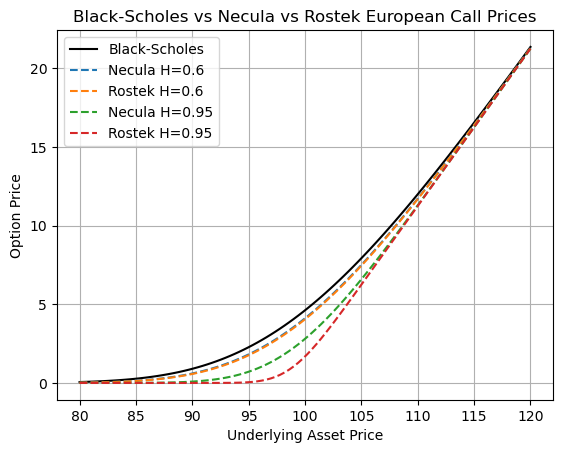

In [2]:
S0_range = np.linspace(80, 120, 100)  # Initial price range
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
t= 0  #Current Date
T = 0.25  #maturity
H_values = [0.6, 0.95]

# Black-Scholes
bs_prices = [BlackScholesModel(S, K, r, sigma, t, T).price() for S in S0_range]
plt.plot(S0_range, bs_prices, label='Black-Scholes', color='black')

# Necula and Rostek
for H in H_values:
    nec_prices = [NeculaModel(S, K, r, sigma, t, T, H).price() for S in S0_range]
    ros_prices = [RostekModel(S, K, r, sigma, t, T, H).price() for S in S0_range]

    plt.plot(S0_range, nec_prices, '--', label=f'Necula H={H}')
    plt.plot(S0_range, ros_prices, '--', label=f'Rostek H={H}')

# Formatting and labels
plt.legend()
plt.grid(True)
plt.title('Black-Scholes vs Necula vs Rostek European Call Prices')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')

# Show the plot
plt.show()


# Default probability profiles for different Hurst coeffs

In [3]:
sigma_A = 0.5
mu = 0
VA = 10000
company_debt = 5000
T_range = [2, 5, 10, 15]

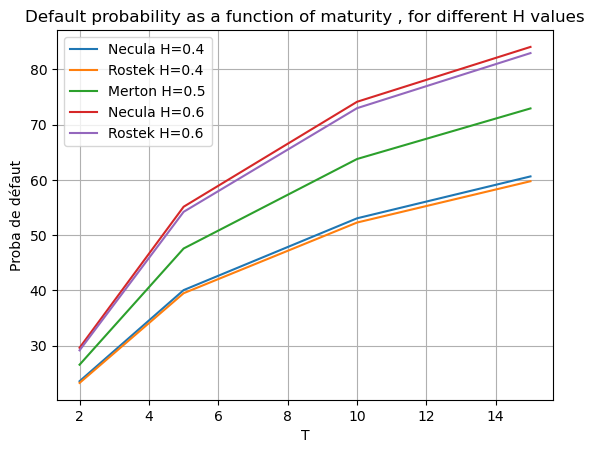

In [4]:
# Set up the plot
plt.title("Default probability as a function of maturity , for different H values")

# Dictionary of H values and their corresponding labels
H_values = {0.4: "Necula", 0.5: "Merton", 0.6: "Necula"}

# Loop through H values to calculate and plot probabilities
for H, label in H_values.items():
    probas_necula = [NeculaModel(0, K, r, sigma, t, T, H).proba_default(VA, sigma_A, mu, company_debt) for T in T_range]
    plt.plot(T_range, probas_necula, label=f"{label} H={H}")
    
    # Only compute Rostek for H != 0.5 (since Merton has no Rostek counterpart)
    if H != 0.5:
        probas_rostek = [RostekModel(0, K, r, sigma, t, T, H).proba_default(VA, sigma_A, mu, company_debt) for T in T_range]
        plt.plot(T_range, probas_rostek, label=f"Rostek H={H}")

# Add labels, legend, and display the plot
plt.xlabel("T")
plt.ylabel("Proba de défaut")
plt.legend()
plt.grid(True)
plt.show()

# Grey Noise exploration

In [5]:
beta = 0.9
S0 = 150
K = 100
r = 0.05
sigma = 0.25
tau = 0.25
T = 0.25  # Maturity
S0_range = np.linspace(80, 120, 100)  # Initial price range
t = 0
Ns = 20
Nmu = 20

Text(0, 0.5, 'Option Price')

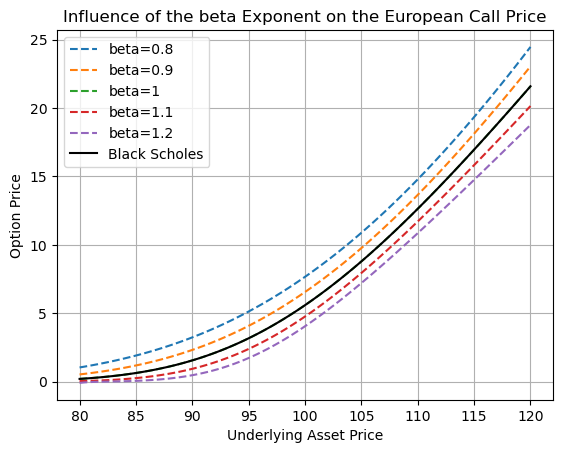

In [8]:
beta_list=[0.8, 0.9, 1, 1.1, 1.2]
BS_option_prices=[BlackScholesModel(S0, K, r, sigma, t,T).price() for S0 in S0_range]
for beta in beta_list:
    grey_option_prices = [GreyNoise(beta, S0, K, r, sigma, t, T, Ns, Nmu).grey_call_price() for S0 in S0_range]
    plt.plot(S0_range,grey_option_prices,'--',label='beta='+str(beta))
plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.legend()
plt.grid()
plt.title('Influence of the beta Exponent on the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')